<a href="https://colab.research.google.com/github/ekqlsrla/ESAA/blob/main/HW/0520_CH5_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[파이썬 머신러닝 가이드]**
---
# **CHAPTER 05 회귀**


## 1. 회귀소개

### 1) **회귀** : 여러 개의 독립 변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법

-> 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀계수**를 찾아내는 것

###2) 회귀 유형

  (1) 단일 회귀 : 독립변수 개수 **1개**

  (2) 다중 회귀 : 독립변수 개수 **여러 개**

  (3) 선형 회귀 : 회귀 계수의 결합이 **선형**

  (4) 비선형 회귀 : 회귀 계수의 결합이 **비선형**

###3) 지도학습 유형

(1) Classification : 예측값이 **이산형** 클래스

(2) Regression : 예측값이 **연속형** 숫자값

###4) 대표적인 선형 회귀 모델

*규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것* 

* 일반선형회귀 : 예측값과 실제 값의 **RSS를 최소화**할 수 있도록 최적화, 규제 X
* 릿지(RIdge) : 선형 회귀에 **L2 규제**를 추가한 회귀 모델
  * `L2` 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
* 라쏘(Lasso) : 선형 회귀에 **L1 규제**를 적용한 방식
  * `L1(=피처 선택 기능)` 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 선택되지 않게 함
* 엘라스틱넷(ElasticNet) : **L2,L1**규제를 함께 결합한 모델로 주로 피처가 많은 데이터세트에서 적용
* 로지스틱 회귀(Logistic Regression) : **분류**에 사용되는 선형 모델

---
## 2. 단순 선형 회귀를 통한 회귀 이해

### 1) 회귀식
## $$\hat{Y} = w_0 + w_1 * X$$

* $w_1$ , $w_0$ : 회귀 계수
* 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류값

### 2) RSS(Residual Sum of Square)

##$$RSS(w_0,w_1 )= {1 \over N} \sum\limits_{i=1}^N{(y_i -(w_0 + w_1 *x_i)^2}$$

* 회귀식의 독립변수 X, 종속변수 Y가 중심변수가 아니라 **회귀계수가** 중심 변수

---
## 3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개
 : 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 **W 파라미터 구하는 방식**

**Step1** $w_0,w_1$를 임의의 값으로 설정하고 첫 비용 함수의 값 계산

**Step2** 다음과 같이 업데이트 한 후 다시 비용함수의 값을 계산

$w_1 = w_1 + n{2 \over N}\sum\limits_{i=1}^Nx_i *(실제값-예측값)$,
$w_0 = w_0 + n{2 \over N}\sum\limits_{i=1}^Nx_i *(실제값-예측값)$

**Step3** 비용 함수의 값이 감소했다면 Step2 반복, 더 이상 값이 감소하지 않으면 반복 중지



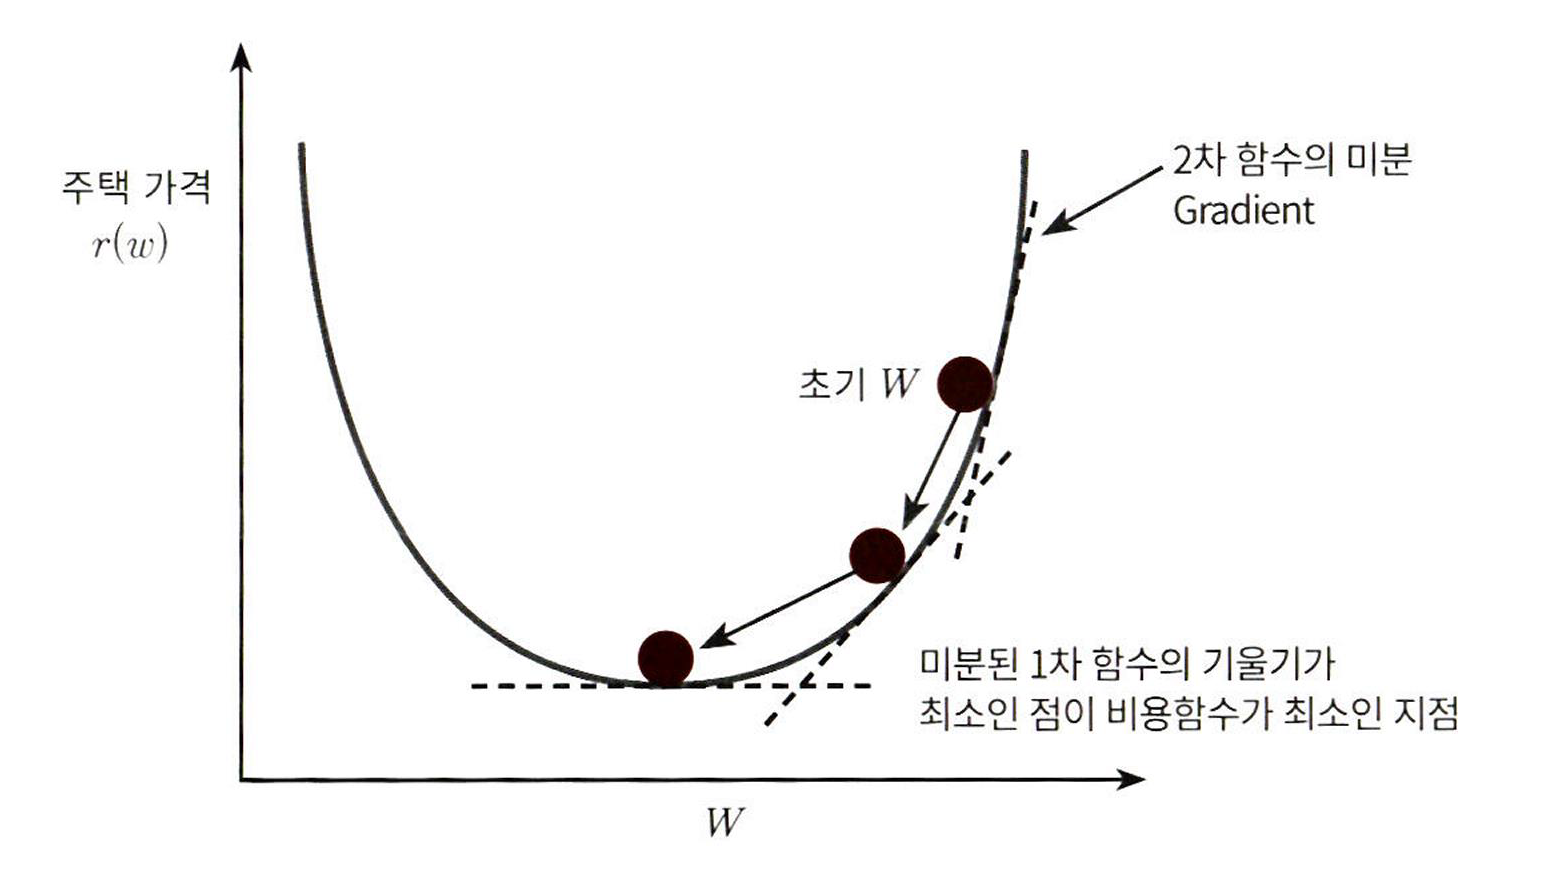

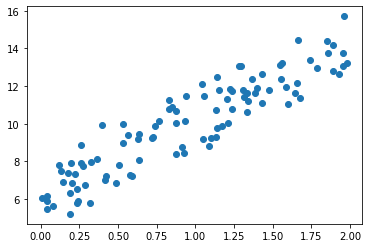

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 6 + 4* X+np.random.randn(100,1)

plt.scatter(X,y)

In [2]:
#비용 함수 정의

def get_cost(y,y_pred) :
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [6]:
#경사하강법 구현

def get_weight_updates(w1,w0,X,y,learning_rate = 0.01) :
  N = len(y)
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  y_pred = np.dot(X,w1.T) + w0
  diff = y-y_pred
  
  #모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  #업데이트 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update,w0_update

In [7]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps (X,y,iters = 10000) :
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  for ind in range(iters) :
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  
  return w1,w0

In [8]:
def get_cost(y,y_pred) :
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1,w0 = gradient_descent_steps(X,y,iters = 100)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.862 w0:5.058
Gradient Descent Total Cost : 1.3596


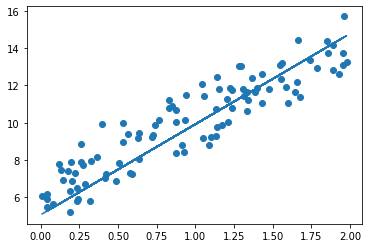

In [9]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [14]:
#(미니배치) 확률적 경사 하강법

def stochastic_gradient_descent_steps (X,y, batch_size=10, iters = 1000) :
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters) :
    np.random.seed(ind)
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    w1_update,w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  
  return w1,w0



In [15]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters = 1000)
print('w1 :',round(w1[0,0],3), 'w0:',round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1 : 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost : 0.9937


* 피처가 여러개인 경우

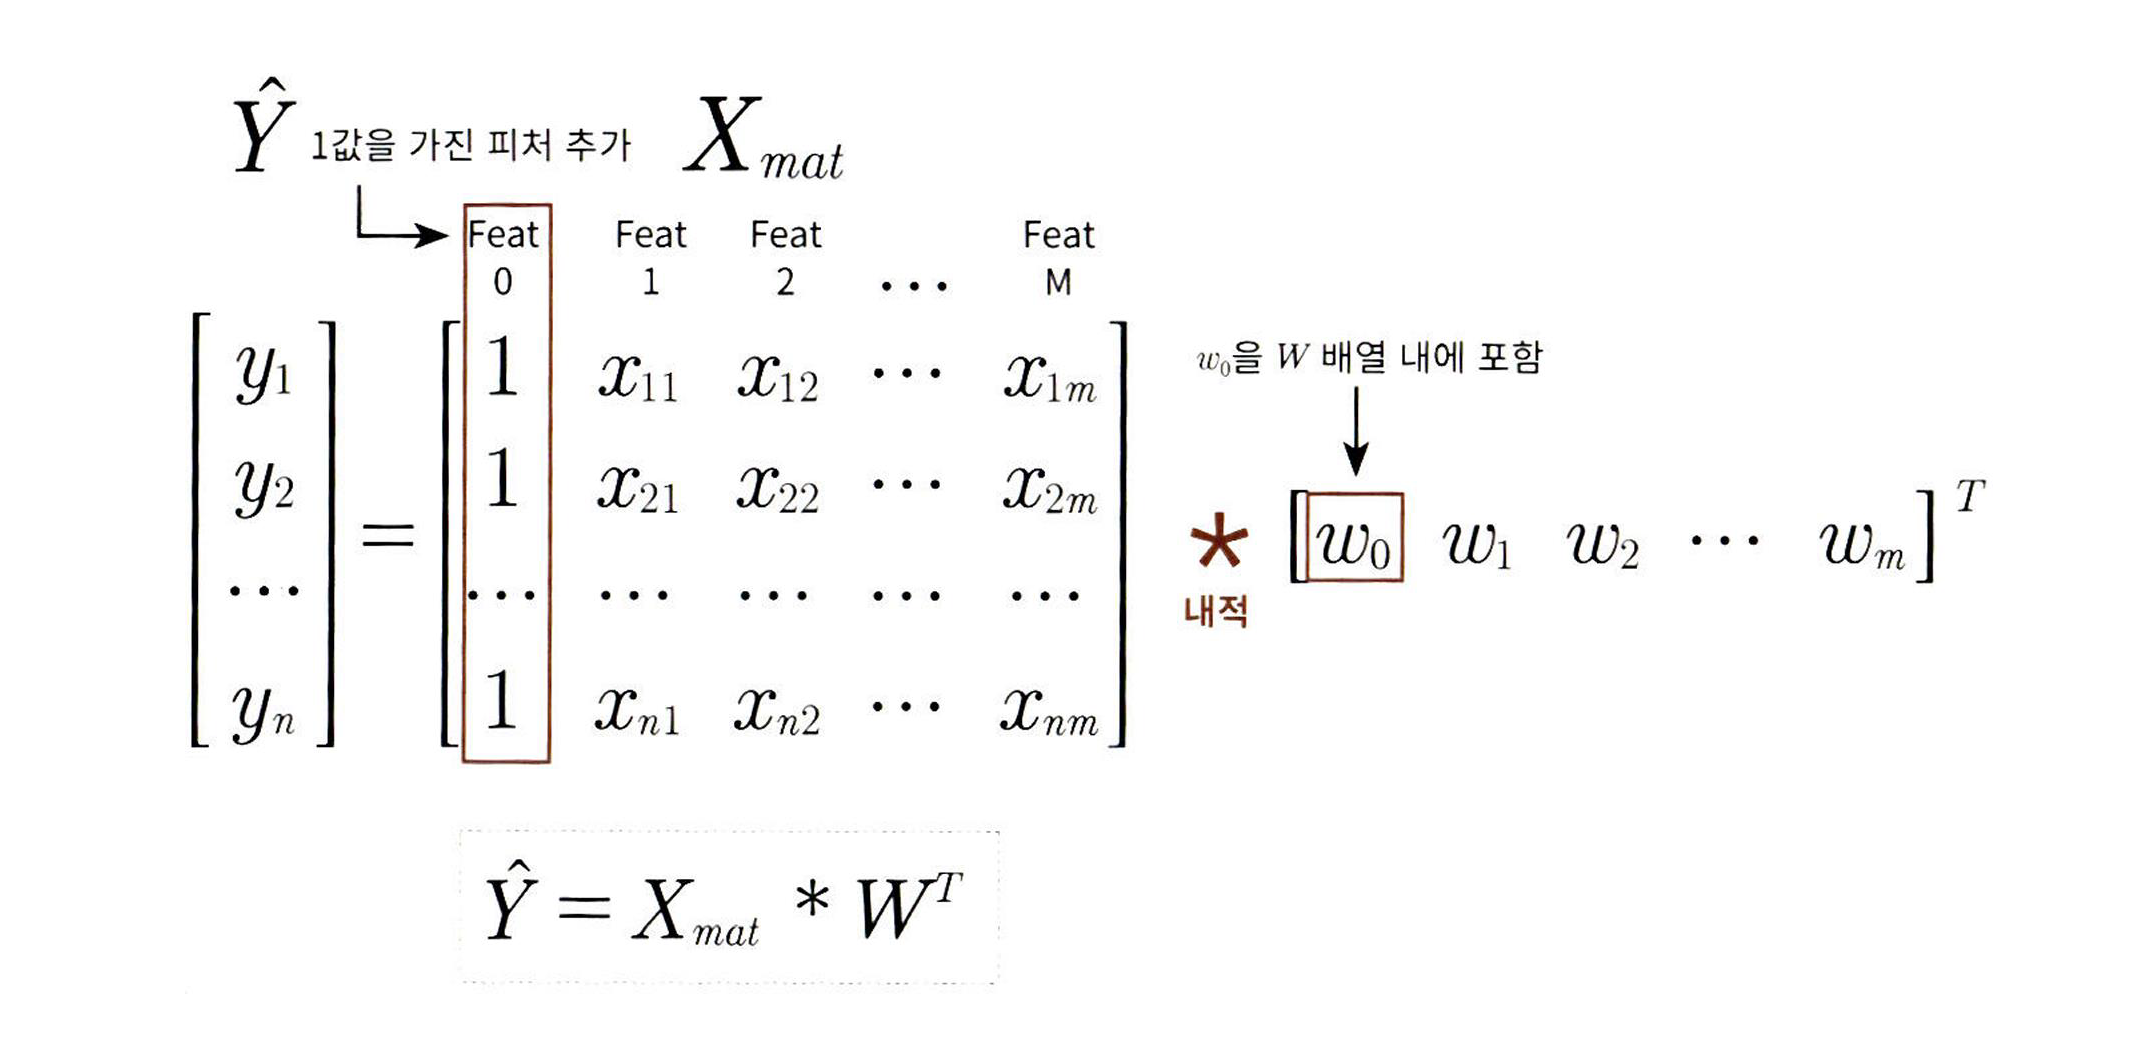

---
## 4. 다항 회귀와 과(대)적합/ 과소적합 이해



### 1) 다항회귀 이해 -> **선형회귀**

: 2차, 3차 방정식과 같은 다항식으로 표현되는 것

$$ y = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1*x_2 + w_4*x_1^2 + w_5*x_2^2 $$

* `PolynomialFeatures` degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환


In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 :\n',X)

#degree = 2인 2차 다항식으로 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n',poly_ftr)

일차 단항식 계수 피처 :
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [17]:
# 피처값을 입력하면 결정값을 반환하는 함수

def polynomial_fun(X) :
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature : \n',X)
y = polynomial_fun(X)
print('삼차 다항식 결정값 :\n',y)


일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 :
 [  5 125]


In [20]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature : \n',poly_ftr)

#Linear Regression에 3차 다항식 계수 featue와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) :
  y = 1+ 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

model = Pipeline([('poly',PolynomialFeatures(degree = 3)),
                  ('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 2) 다항회귀를 이용한 과소적합 및 과적합 이해


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#X값에 대해 코사인 변환 값 반환
def true_fun(X) :
  return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1



Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.043208749872320706 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]입니다.
Degree 15 MSE는 180526263.3177066 입니다.


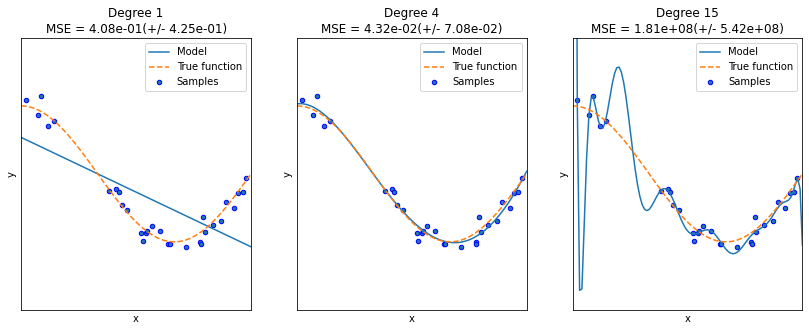

In [33]:
plt.figure(figsize = (14,5))
degrees = [1,4,15]

#다항 회귀 차수를 변화시키면서 비교
for i in range(len(degrees)) :
  ax = plt.subplot(1,len(degrees),i + 1)
  plt.setp(ax,xticks = (),yticks = ())

  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features',polynomial_features),
                       ('linear_regression',linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  #교차 검증으로 다항회귀 평가
  scores = cross_val_score(pipeline,X.reshape(-1,1),y,scoring = 'neg_mean_squared_error',cv = 10)
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i],np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))

  X_test = np.linspace(0,1,100)
  #예측값 곡선
  plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]), label = 'Model')
  #실제 값 곡선
  plt.plot(X_test, true_fun(X_test), '--',label = 'True function')
  plt.scatter(X,y,edgecolor = 'b',s = 20, label = 'Samples')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc = 'best')
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i],-scores.mean(),scores.std()))

* Degree 1의 예측 곡선은 단순 선형회귀와 같음. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 **과소적합 모델**

* Degree 4 의 예측 곡선은 실제 데이터와 유사한 모습.

* Degree 15의 예측 곡선은 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태로 **과적합 모델**

### 3) 편향 분산 트레이드 오프(Bias-Variance trade off)

* Degree 1과 같은 모델은 단순화된 모델로서 지나치게 한 방향으로 치우친 경향 -> `고편향(High Bias)`
* Degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하여 매우 복잡하고 지나치게 높은 변동성 -> `고분산(High Variance)`
* 일반적으로 편향과 분산은 **한 쪽이 높으면 한 쪽이 낮아지는 경향**
* 높은 편향/낮은 분산 : **과소적합** 
* 낮은 편향/높은 분산 : **과적합**

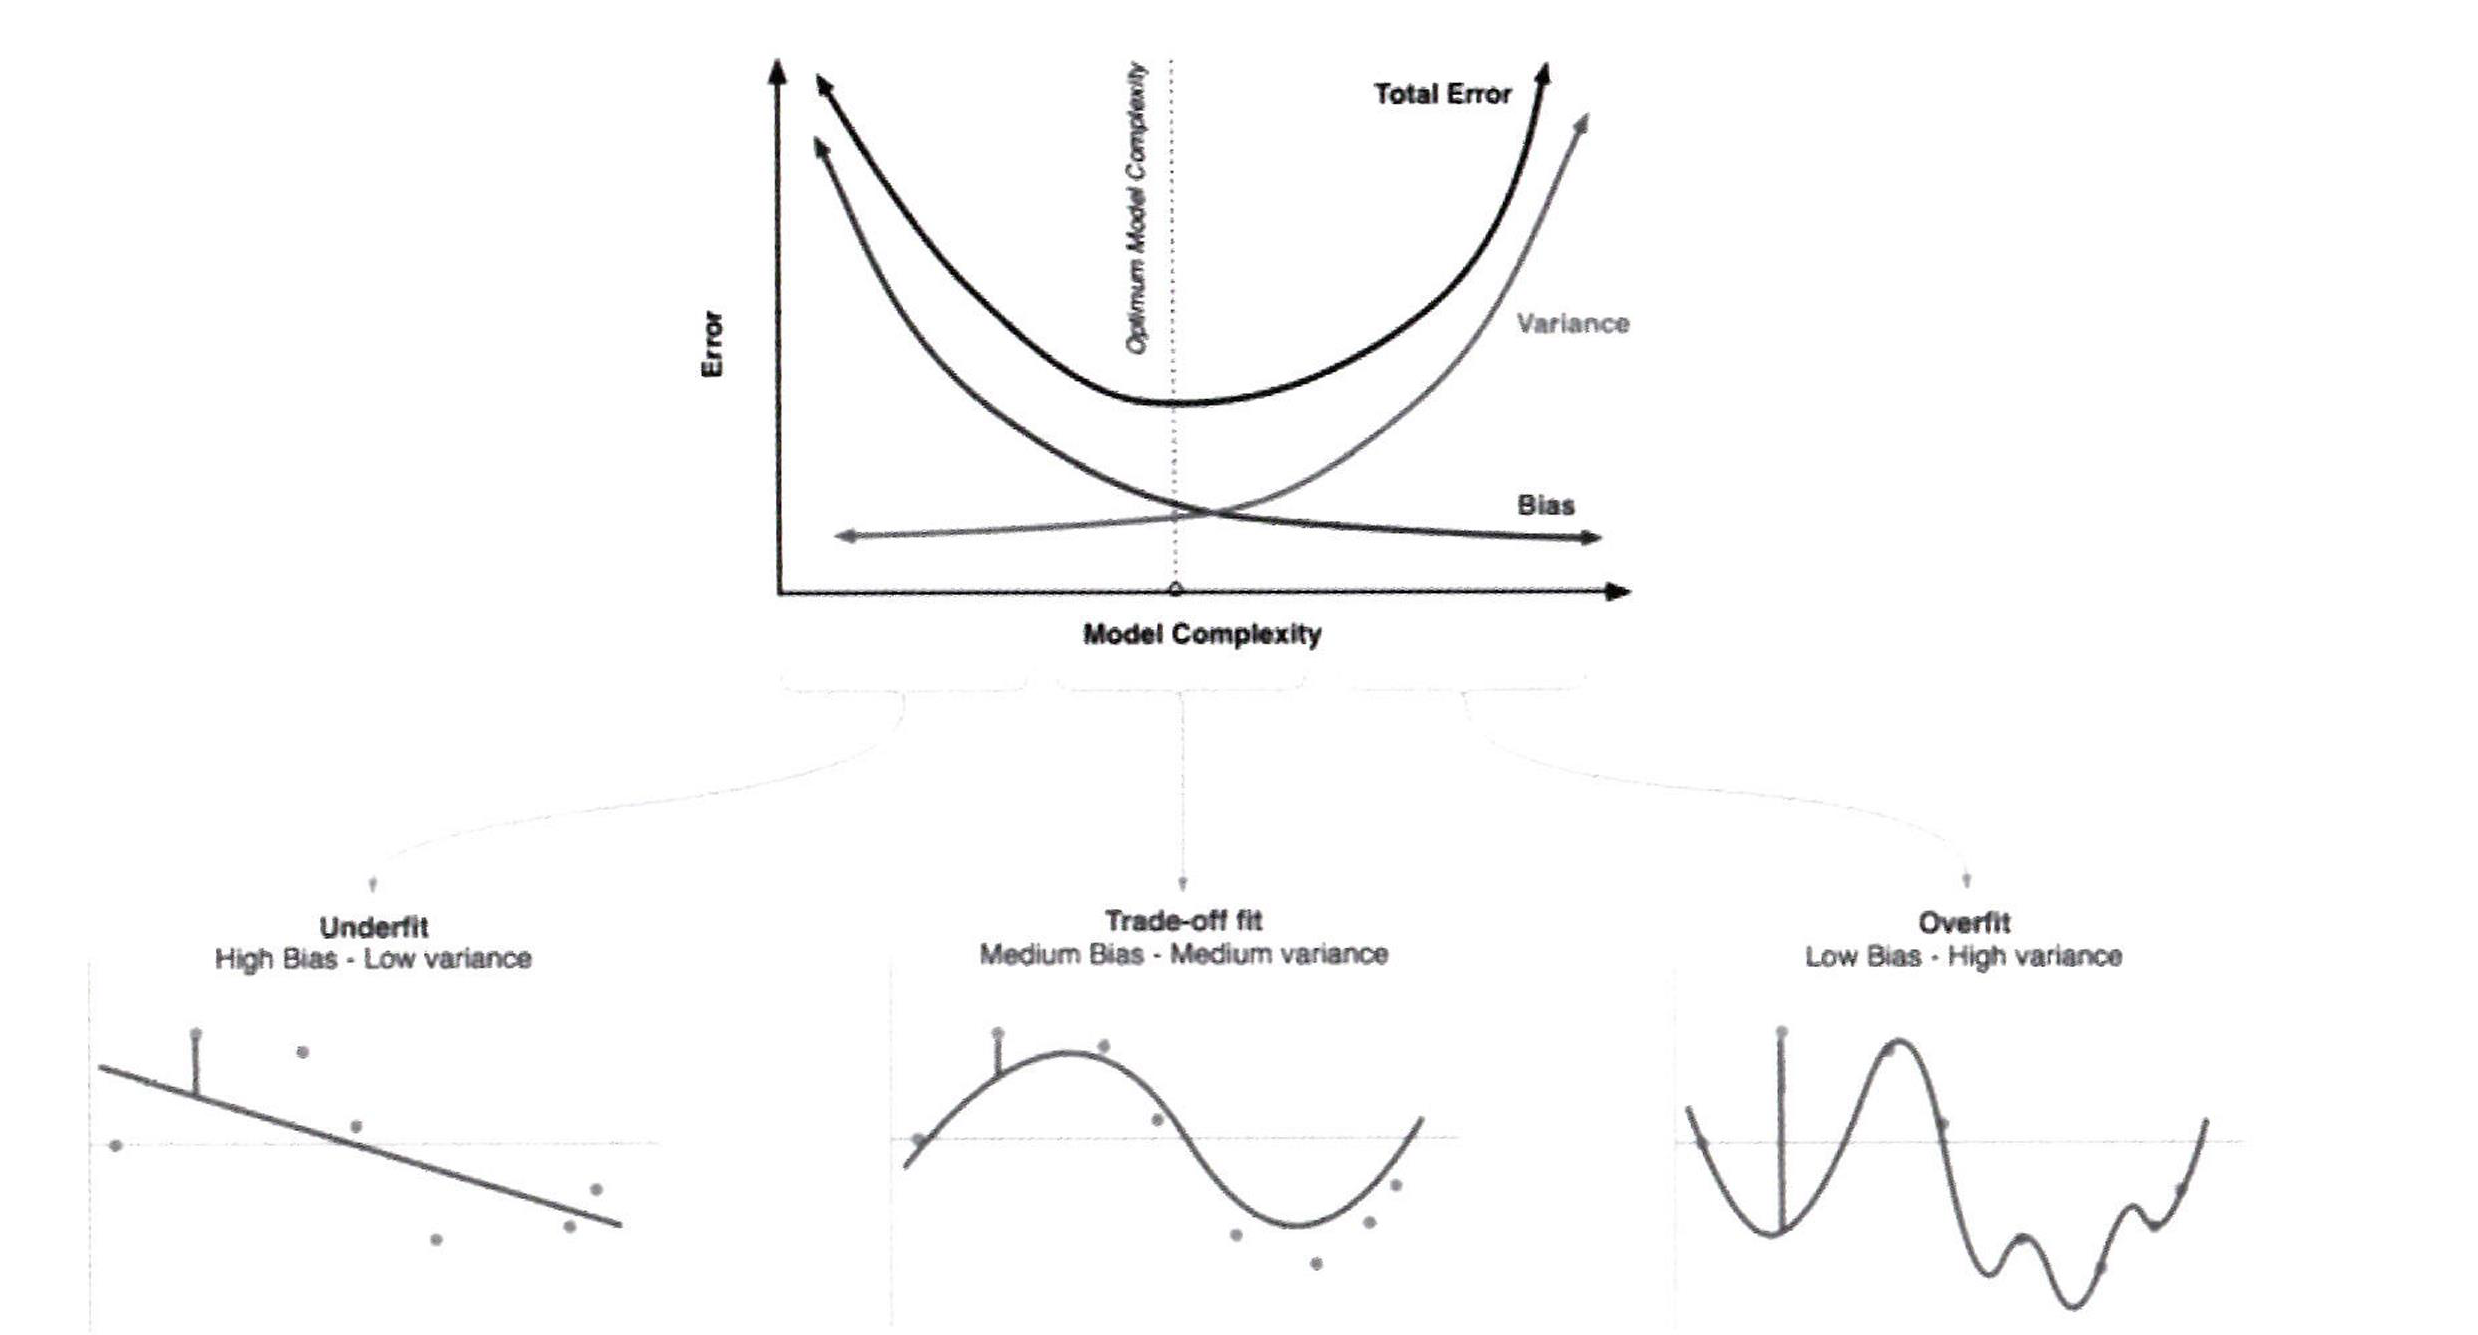